In [31]:
import pandas as pd
import numpy as np

## 2023년 데이터 전처리

In [32]:
df= pd.read_excel('data/2023/2023 외래관광객조사 DATA.xlsx')

print(df.head())

   pnid  MVIT  RVIT  XRVIT  TYP  Q1  Q1_1a1  Q1_1a2  Q1_1a3  Q2a1  ...  Q14  \
0     6     4     4    5.0    1   1     2.0     3.0     4.0   4.0  ...    5   
1     7    20     4    5.0    1   2     2.0     9.0     7.0   NaN  ...    5   
2     8     2     2    5.0    1   5     NaN     NaN     NaN   NaN  ...    5   
3    10     1     1    NaN    1   3     NaN     NaN     NaN   NaN  ...    4   
4    11     3     3    5.0    1   2     8.0     3.0     7.0   NaN  ...    5   

   D_MON  D_BUN  D_NAT  D_SEX  D_AGE  D_MOK  D_NUM  D_GUB      weight  
0      1      1      3      2      2      1      4      1  866.099893  
1      1      1      1      1      3      2      4      1  191.333757  
2      1      1      4      2      1      5      2      1  244.838755  
3      1      1      5      1      5      3      1      1  555.272342  
4      1      1      1      2      4      2      3      1  193.434506  

[5 rows x 365 columns]


In [33]:
df['Q8a01'].value_counts()

Q8a01
1.0    11196
Name: count, dtype: int64

- 국적: D_NAT
- 체류기간: M일HAP
- 동반자 유무: Q7A
- 동행자 유형: Q7a_dk ~ Q7a8
- 여행 형태: D_GUB
- 방문 목적: D_MOK
- 총지출: 총액1인TOT2
- 여가·체험 관련 지출 항목: C문화서1인대체, C오락및1인대체, C미용서1인대체
- 가중치: weight 

In [3]:
cols_needed = ['D_NAT', 'M일HAP', 
               'Q7A','Q7a_dk', 'Q7a2', 'Q7a3', 'Q7a4', 'Q7a5', 'Q7a6', 'Q7a7', 'Q7a8',
               'D_GUB', 'D_MOK', '총액1인TOT항공제외2', 
               'C문화서1인대체', 'C오락및1인대체', 'C미용서1인대체', 'weight']
df = df[cols_needed]

In [4]:
df

,D_NAT,M일HAP,Q7A,Q7a_dk,Q7a2,Q7a3,Q7a4,Q7a5,Q7a6,Q7a7,Q7a8,D_GUB,D_MOK,총액1인TOT항공제외2,C문화서1인대체,C오락및1인대체,C미용서1인대체,weight
0,3,27,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1093.21,2,1,1,866.099893
1,1,7,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1621.28,1,1,1,191.333757
2,4,2,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5,150.00,1,1,1,244.838755
3,5,8,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,2818.20,1,1,1,555.272342
4,1,71,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1646.16,1,1,1,193.434506
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16191,1,6,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1,1,925.98,1,1,1,1205.023267
16192,1,5,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1,1,4812.29,1,1,1,1160.261837
16193,1,4,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1,2,336.68,2,1,1,1403.603404
16194,1,4,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1,1,357.77,1,1,1,1220.901706


In [5]:
df.isnull().sum()

D_NAT               0
M일HAP               0
Q7A                 0
Q7a_dk          10690
Q7a2            13369
Q7a3            14923
Q7a4            14887
Q7a5            14512
Q7a6            12350
Q7a7            14476
Q7a8            16078
D_GUB               0
D_MOK               0
총액1인TOT항공제외2        0
C문화서1인대체            0
C오락및1인대체            0
C미용서1인대체            0
weight              0
dtype: int64

### 동행자 유형 분류

In [6]:
# 1. 동행자 관련 컬럼만 추출
companion_cols = ['Q7a_dk', 'Q7a2', 'Q7a3', 'Q7a4', 'Q7a5', 'Q7a6', 'Q7a7', 'Q7a8']

# 2. 결측치 처리 안함 
# 결측치는 <선택하지 않음>을 의미하므로 처리하지 않음

# 3. 동행자유형 파생 변수 만들기
def classify_companion(row):
    # 혼자 온 경우
    if row['Q7a_dk'] == 1:
        return '혼자'

    # 가족 유형
    if any([
        row['Q7a2'] == 2,
        row['Q7a3'] == 3,
        row['Q7a4'] == 4,
        row['Q7a5'] == 5
    ]):
        return '가족'

    # 친구
    if row['Q7a6'] == 6:
        return '친구'

    # 직장동료
    if row['Q7a7'] == 7:
        return '직장동료'

    # 기타
    if row['Q7a8'] == 8:
        return '기타'

    # 아무 것도 선택하지 않은 경우
    return '응답없음'

# 4. 적용
df['동행자유형'] = df.apply(classify_companion, axis=1)

# 5. 유효 응답만 남기기
df = df[df['동행자유형'] != '응답없음'].copy()


In [7]:
df.isnull().sum()

D_NAT               0
M일HAP               0
Q7A                 0
Q7a_dk          10690
Q7a2            13369
Q7a3            14923
Q7a4            14887
Q7a5            14512
Q7a6            12350
Q7a7            14476
Q7a8            16078
D_GUB               0
D_MOK               0
총액1인TOT항공제외2        0
C문화서1인대체            0
C오락및1인대체            0
C미용서1인대체            0
weight              0
동행자유형               0
dtype: int64

In [8]:
df.columns

Index(['D_NAT', 'M일HAP', 'Q7A', 'Q7a_dk', 'Q7a2', 'Q7a3', 'Q7a4', 'Q7a5',
       'Q7a6', 'Q7a7', 'Q7a8', 'D_GUB', 'D_MOK', '총액1인TOT항공제외2', 'C문화서1인대체',
       'C오락및1인대체', 'C미용서1인대체', 'weight', '동행자유형'],
      dtype='object')

In [9]:
df['동행자유형'].value_counts()

동행자유형
가족      5511
혼자      5506
친구      3526
직장동료    1588
기타        65
Name: count, dtype: int64

### 국적 선별 
- 2023년 글로벌 방한 관광객 통계 기준 상위 6개국 
- GWI-Rankings 상위 5개국 중 2개국(방한관광객 상위 국가와 중복 제외)

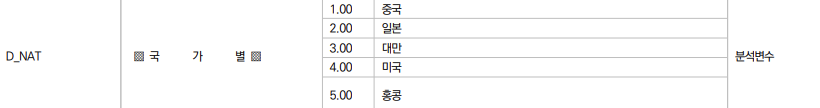
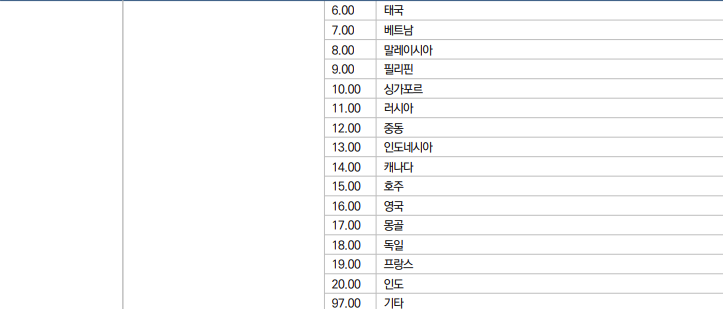

In [10]:
df['D_NAT'].value_counts()

D_NAT
2     1963
1     1588
4     1444
3     1263
10     873
5      868
6      824
97     682
8      678
13     664
15     639
12     583
14     537
7      521
9      512
19     497
18     496
16     488
20     385
17     359
11     332
Name: count, dtype: int64

### 국가명 매핑

In [11]:
df['D_NAT'].dtype

dtype('int64')

In [12]:
nat_map = {
    1: '중국',
    2: '일본',
    3: '대만',
    4: '미국',
    5: '홍콩',
    6: '태국',
    7: '베트남',
    10: '싱가포르',
    16: '영국',
    18: '독일'
}

df['국가명'] = df['D_NAT'].map(nat_map)

# 분석 대상 국가만 필터링
df = df[df['국가명'].notna()]

In [13]:
df

,D_NAT,M일HAP,Q7A,Q7a_dk,Q7a2,Q7a3,Q7a4,Q7a5,Q7a6,Q7a7,Q7a8,D_GUB,D_MOK,총액1인TOT항공제외2,C문화서1인대체,C오락및1인대체,C미용서1인대체,weight,동행자유형,국가명
0,3,27,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1,1093.21,2,1,1,866.099893,혼자,대만
1,1,7,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1621.28,1,1,1,191.333757,혼자,중국
2,4,2,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,5,150.00,1,1,1,244.838755,혼자,미국
3,5,8,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,3,2818.20,1,1,1,555.272342,혼자,홍콩
4,1,71,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2,1646.16,1,1,1,193.434506,혼자,중국
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16191,1,6,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1,1,925.98,1,1,1,1205.023267,친구,중국
16192,1,5,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1,1,4812.29,1,1,1,1160.261837,친구,중국
16193,1,4,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1,2,336.68,2,1,1,1403.603404,친구,중국
16194,1,4,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,NaN,1,1,357.77,1,1,1,1220.901706,친구,중국


In [14]:
df['국가명'].value_counts()

국가명
일본      1963
중국      1588
미국      1444
대만      1263
싱가포르     873
홍콩       868
태국       824
베트남      521
독일       496
영국       488
Name: count, dtype: int64

In [15]:
df['C문화서1인대체'].isnull().sum()
df['C미용서1인대체'].isnull().sum()
df['C오락및1인대체'].isnull().sum()

np.int64(0)

### 여가·체험 지출 비율 변수 만들기
- 여가체험비율 = (C문화서1인대체 + C미용서1인대체 + C오락및1인대체) / 총지출
- 총액1인TOT2가 0인 경우 → 0으로 나누는 오류 발생 가능 → 제외 필요
- 결측치는 없지만 분모가 0인 경우를 먼저 제거

In [16]:
# 총지출이 0 초과인 응답만 필터링
df = df[df['총액1인TOT항공제외2'] > 0]

In [17]:
# 여가체험비율 계산
df['여가체험비율'] = (
    df['C문화서1인대체'] + df['C미용서1인대체'] + df['C오락및1인대체']
) / df['총액1인TOT항공제외2']

In [18]:
df['여가체험비율'].head(15)

0     0.003659
1     0.001850
2     0.020000
3     0.001065
4     0.001822
5     0.003508
7     0.001446
9     0.002245
10    0.003497
11    0.002140
12    0.002792
13    0.006209
14    0.002217
17    0.002027
18    0.001952
Name: 여가체험비율, dtype: float64

### 여행 목적 컬럼 (D_MOK) 전처리
- 여가/위락/힐링, 친구/친지 방문, 사업/전문 활동, 교육, 기타
- 여가/힐링을 즐길 의사와 여건이 있었던 응답자만 포함

In [19]:
df['D_MOK'].dtype

dtype('int64')

In [20]:
df = df[df['D_MOK'].isin([1, 2])]

In [21]:
df

,D_NAT,M일HAP,Q7A,Q7a_dk,Q7a2,Q7a3,Q7a4,Q7a5,Q7a6,Q7a7,...,D_GUB,D_MOK,총액1인TOT항공제외2,C문화서1인대체,C오락및1인대체,C미용서1인대체,weight,동행자유형,국가명,여가체험비율
0,3,27,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,1,1093.21,2,1,1,866.099893,혼자,대만,0.003659
1,1,7,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,1621.28,1,1,1,191.333757,혼자,중국,0.001850
4,1,71,1,1.0,NaN,NaN,NaN,NaN,NaN,NaN,...,1,2,1646.16,1,1,1,193.434506,혼자,중국,0.001822
5,5,5,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,1,1,1140.09,2,1,1,298.390736,친구,홍콩,0.003508
9,3,8,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,1,1,1336.60,1,1,1,636.214288,친구,대만,0.002245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16191,1,6,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,1,1,925.98,1,1,1,1205.023267,친구,중국,0.003240
16192,1,5,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,1,1,4812.29,1,1,1,1160.261837,친구,중국,0.000623
16193,1,4,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,1,2,336.68,2,1,1,1403.603404,친구,중국,0.011881
16194,1,4,2,NaN,NaN,NaN,NaN,NaN,6.0,NaN,...,1,1,357.77,1,1,1,1220.901706,친구,중국,0.008385


### 이상치 확인

총액1인TOT항공제외2가 0 이하인 경우 수: 0
count    8060.000000
mean     1378.313191
std      1337.472989
min       144.400000
25%       649.630000
50%       983.520000
75%      1575.737500
max      9549.510000
Name: 총액1인TOT항공제외2, dtype: float64


c:\Users\82106\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52509 (\N{HANGUL SYLLABLE CONG}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82106\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51648 (\N{HANGUL SYLLABLE JI}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82106\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52636 (\N{HANGUL SYLLABLE CUL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82106\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 51060 (\N{HANGUL SYLLABLE I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82106\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 

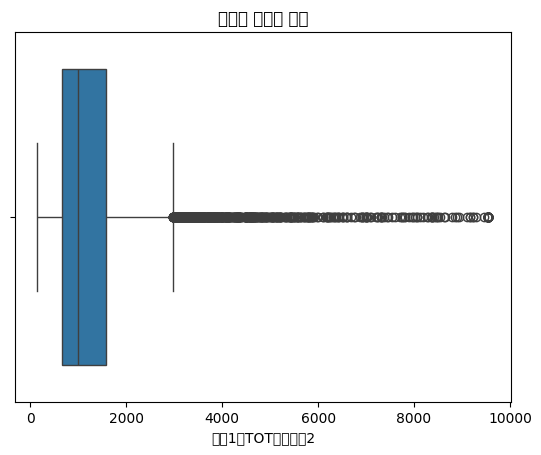

In [22]:
# 총액1인TOT2 (총 지출): 0, 음수, 이상치 확인
# 총지출 0 또는 음수 확인
print("총액1인TOT항공제외2가 0 이하인 경우 수:", (df['총액1인TOT항공제외2'] <= 0).sum())

# 이상치 탐지용 기초 통계
print(df['총액1인TOT항공제외2'].describe())

# boxplot 시각화
import seaborn as sns
import matplotlib.pyplot as plt
sns.boxplot(x=df['총액1인TOT항공제외2'])
plt.title("총지출 이상치 확인")
plt.show()

- 비율 중심 분석이므로 절댓값 이상치는 직접 영향 없음
- 고지출자는 웰니스 콘텐츠 주요 타겟일 가능성도 있음	
- 응답 수 적은 국가나 유형에서 이상치 제거 시 왜곡 우려

- ANOVA 검정 안정 확보를 위해 로그 변환 변수 추가

In [23]:
df['log_총액'] = np.log(df['총액1인TOT항공제외2'])

여가체험비율 ≤ 0: 0
여가체험비율 ≥ 1: 0


c:\Users\82106\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 50668 (\N{HANGUL SYLLABLE YEO}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82106\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 44032 (\N{HANGUL SYLLABLE GA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82106\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 52404 (\N{HANGUL SYLLABLE CE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82106\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 54744 (\N{HANGUL SYLLABLE HEOM}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
c:\Users\82106\anaconda3\envs\tensorflow_env\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph

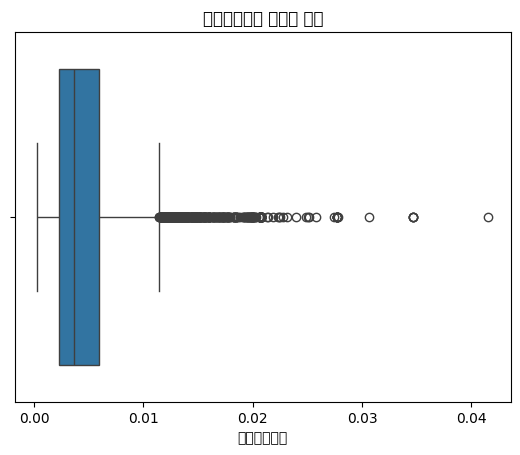

In [24]:
# 여가체험비율: 0 이하 / 1 이상 값 확인
# 비율이 0 이하이거나 1 이상인 경우 확인
print("여가체험비율 ≤ 0:", (df['여가체험비율'] <= 0).sum())
print("여가체험비율 ≥ 1:", (df['여가체험비율'] >= 1).sum())

# 분포 시각화
sns.boxplot(x=df['여가체험비율'])
plt.title("여가체험비율 이상치 확인")
plt.show()


- 이상치(1.0 초과)는 일부 존재하지만 현실적으로 가능한 사례일 수 있음
- 전체 분석에서는 그대로 유지하되, 추후 1 이상인 응답자 수와 특성을 보조적으로 점검

In [25]:
# 분류 성공 여부 및 결측 확인
# 결측치 확인
print("동행자유형 결측치 수:", df['동행자유형'].isnull().sum())

# 고유값 확인
print("동행자유형 고유값 목록:", df['동행자유형'].dropna().unique())

동행자유형 결측치 수: 0
동행자유형 고유값 목록: ['혼자' '친구' '가족' '직장동료' '기타']


In [26]:
print(df['여가체험비율'].describe())

count    8060.000000
mean        0.004752
std         0.003862
min         0.000314
25%         0.002283
50%         0.003662
75%         0.005952
max         0.041551
Name: 여가체험비율, dtype: float64


### 23년도 전처리 데이터 저장

In [28]:
df['year'] = 2023  # 연도 컬럼 붙이기
df.to_csv("data/2023/외래관광객조사_2023_전처리.csv", index=False, encoding='utf-8-sig')